In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## データの読み込み

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')['Survived']
X_test  = pd.read_csv('data/X_test.csv')

X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

## モデル生成
- パイプラインとGridSearchで良いパラメータを探す

In [3]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## SVM + MinMaxScaler

In [4]:
# パイプライン
estimator = [('scaler', MinMaxScaler()),
             ('clf', SVC(random_state=365))]

pipe = Pipeline(estimator)

# Grid Search
C_range = 10**np.arange(-3.0, 6.0)
param = {'clf__C': C_range,
         'clf__kernel': ['rbf']}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1976s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1383s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.4s finished


({'clf__C': 1.0, 'clf__kernel': 'rbf'},
 0.822666499278137,
 Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='scale', kernel='rbf', max_iter=-1,
                      probability=False, random_state=365, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False))

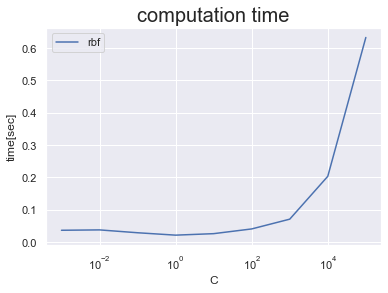

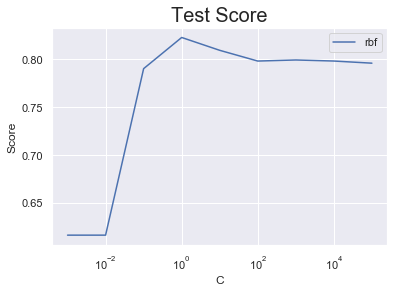

In [5]:
res = gs.cv_results_

# 処理時間のプロット
s_rbf = (res['param_clf__kernel'] == 'rbf')
plt.plot(C_range, res['mean_fit_time'][s_rbf], label='rbf')

# s_linear = (res['param_clf__kernel'] == 'linear')
# plt.plot(C_range, res['mean_fit_time'][s_linear], label='linear')

plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('time[sec]', fontsize=12)
plt.title('computation time', fontsize=20)
plt.legend()
plt.show()

# 精度のプロット
plt.plot(C_range, res['mean_test_score'][s_rbf], label='rbf')
# plt.plot(C_range, res['mean_test_score'][s_linear], label='linear')

plt.legend()
plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Test Score', fontsize=20)
plt.show()

#### 予測の作成

In [6]:
y_pred = gs.predict(X_test)
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)

# 予測の保存
df_result.to_csv('output/submission_svm_minmaxScaler.csv', index=False)

## SVC + Standard Scaler

In [7]:
# パイプライン
estimator = [('scaler', StandardScaler()),
             ('clf', SVC(random_state=365))]

pipe = Pipeline(estimator)

# Grid Search
C_range = 10**np.arange(-3.0, 6.0)
param = {'clf__C': C_range,
         'clf__kernel': ['rbf']}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1012s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1877s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  33 out of  45 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


({'clf__C': 1.0, 'clf__kernel': 'rbf'},
 0.8215491808423827,
 Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('clf',
                  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='scale', kernel='rbf', max_iter=-1,
                      probability=False, random_state=365, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False))

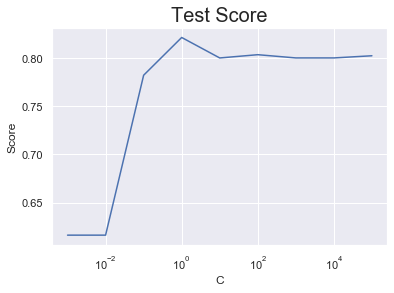

In [8]:
# 精度のプロット
res = gs.cv_results_
plt.plot(C_range, res['mean_test_score'])

plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Test Score', fontsize=20)
plt.show()

In [9]:
y_pred = gs.predict(X_test)
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)

# 予測の保存
df_result.to_csv('output/submission_svm_sscaler.csv', index=False)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# パイプライン
estimator = [('scaler', MinMaxScaler()),
             ('clf', LogisticRegression(random_state=365))]
pipe = Pipeline(estimator)

# GridSearch
C_range = 10**np.arange(-3.0, 6.0)
param = {'clf__C': C_range}
gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0296s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0806s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1690s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


({'clf__C': 1000.0},
 0.8036281463812692,
 Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  LogisticRegression(C=1000.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=365,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False))

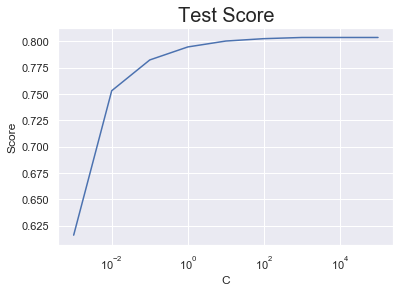

In [12]:
# 精度のプロット
res = gs.cv_results_
plt.plot(C_range, res['mean_test_score'])

plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Test Score', fontsize=20)
plt.show()

In [13]:
y_pred = gs.predict(X_test)
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)

# 予測の保存
df_result.to_csv('output/submission_logi.csv', index=False)

## 確率勾配法

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
estimator = [('scaler', MinMaxScaler()),
             ('clf', SGDClassifier(random_state=365))]
pipe = Pipeline(estimator)

alpha = 10**np.arange(-10.0, -1.0)
param = {'clf__alpha': alpha}
gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0176s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0428s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1182s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished


({'clf__alpha': 0.001},
 0.804695248258113,
 Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  SGDClassifier(alpha=0.001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.0,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='hinge',
                                max_iter=1000, n_iter_no_change=5, n_jobs=None,
                                penalty='l2', power_t=0.5, random_state=365,
                                shuffle=True, tol=0.001, validation_fraction=0.1,
                                verbose=0, warm_start=False))],
          verbose=False))

In [16]:
y_pred = gs.predict(X_test)
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)

# 予測の保存
df_result.to_csv('output/submission_sgd.csv', index=False)

## ニューラルネットワーク

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)

clf = MLPClassifier(random_state=365)
clf.fit(scaler.transform(X_train), y_train)

/Users/tontech/opt/anaconda3/envs/ML-discrimination/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=365, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [19]:
estimator = [('scaler', MinMaxScaler()),
             ('clf', MLPClassifier(random_state=2020, max_iter=1000))]
pipe = Pipeline(estimator)

param = {'clf__alpha': 10**np.arange(-10.0, -1.0),
         'clf__hidden_layer_sizes': [(10),
                                     (10, 100),
                                     (10, 100, 100)]}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.best_estimator_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.2min finished


({'clf__alpha': 1e-05, 'clf__hidden_layer_sizes': (10, 100)},
 0.8160065281526585,
 Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  MLPClassifier(activation='relu', alpha=1e-05,
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(10, 100),
                                learning_rate='constant',
                                learning_rate_init=0.001, max_fun=15000,
                                max_iter=1000, momentum=0.9, n_iter_no_change=10,
                                nesterovs_momentum=True, power_t=0.5,
                                random_state=2020, shuffle=True, solver='adam',
                                tol=0.0001, validation_fraction=0.1,
                                verbose=False, warm_start=False))],
          verbose=Fal

In [20]:
y_pred = gs.predict(X_test)
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)

# 予測の保存
df_result.to_csv('output/submission_mlp.csv', index=False)

In [21]:
!say finished